In [1]:
#Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


#File to load
spotify_data_load = Path('spotify_dataset.csv')

#Read Spotify Datafile and store into dataframe
spotify_data_df = pd.read_csv(spotify_data_load)
spotify_data_df.head(5)

pd.set_option('display.width', 1000)
plt.style.use('dark_background')

In [2]:
#Descriptive Analysis

#How many songs total? (AKA Count)

number_tracks_total = spotify_data_df['track_id'].count()
print('There are a total of', number_tracks_total, 'songs in this dataset.')

#How many songs on average per genre?

#How many genres?
#Necessary to get unique genres - set up count list

genre_list = []
number_genres = 0

for item in spotify_data_df['genre']:
    if item not in genre_list:
        number_genres += 1
        genre_list.append(item)

#Returns the name list of all genres
#print(genre_list)

#returns the number of genres
print('There are', number_genres, 'in this dataset.')

#Min, Max (of popularity)
min_pop = spotify_data_df['popularity'].min(axis = 0)
print('The least popular song has a popularity rating of ', min_pop)

max_pop = spotify_data_df['popularity'].max(axis = 0)
print('The most popular song has a popularity of ', max_pop)

#Mean, Median, Mode (popularity by genre)

avg_pop_by_genre = spotify_data_df.groupby('genre')['popularity'].mean().reset_index()
print(avg_pop_by_genre.head(5))

median_pop_by_genre = spotify_data_df.groupby('genre')['popularity'].median()
print(median_pop_by_genre.head(5))

#The mode of all popularity values
mode_pop_all = spotify_data_df['popularity'].mode()
print('The mode of all popularity values is', mode_pop_all)

#couldn't get it to work by genre? the following code does not work
#mode_pop_by_genre = spotify_data_df.groupby('genre')['popularity'].mode()
#print(mode_pop_by_genre)

#StDev (popularity)
stdev_popularity_bygenre = spotify_data_df.groupby('genre')['popularity'].std()
print(stdev_popularity_bygenre)

stdev_popularity = spotify_data_df['popularity'].std()
print(stdev_popularity)

There are a total of 1159764 songs in this dataset.
There are 82 in this dataset.
The least popular song has a popularity rating of  0
The most popular song has a popularity of  100
         genre  popularity
0     acoustic   17.825094
1     afrobeat    8.559984
2     alt-rock   38.596807
3      ambient   20.008743
4  black-metal   11.089969
genre
acoustic       16.0
afrobeat        4.0
alt-rock       37.0
ambient        20.0
black-metal    10.0
Name: popularity, dtype: float64
The mode of all popularity values is 0    0
Name: popularity, dtype: int64
genre
acoustic       13.203726
afrobeat       10.907781
alt-rock       10.365306
ambient        13.356794
black-metal     8.587339
                 ...    
swedish        12.709019
tango           5.047314
techno         12.666841
trance         12.324947
trip-hop        7.952484
Name: popularity, Length: 82, dtype: float64
15.885544539512717


In [3]:
#Data restricted to 2023 only
spotify_2023 = spotify_data_df[spotify_data_df['year'] == 2023]

number_tracks_total_2023 = spotify_2023['track_id'].count()
print(number_tracks_total_2023)

#Average popularity in each genre for 2023
avg_pop_genre_2023 = spotify_2023.groupby('genre')['popularity'].mean().reset_index()
print(avg_pop_genre_2023)

#Sort top 10 in descending order
top_10_popularity_2023 = avg_pop_genre_2023.sort_values('popularity', ascending = False).head(10)

#Return the top 10
(top_10_popularity_2023.to_string(index=False))


##############################

#Top 10 genres of all time

alltime_pop = spotify_data_df.groupby('genre')['popularity'].mean().reset_index()
alltime_genres = alltime_pop.sort_values('popularity', ascending = False).head(10)
display(alltime_genres.to_string(index=False))



38649
          genre  popularity
0      acoustic   12.894937
1      afrobeat   13.597701
2      alt-rock   30.723705
3       ambient   20.393750
4   black-metal   10.128234
..          ...         ...
76      swedish   26.852083
77        tango    2.330454
78       techno   22.792244
79       trance   26.516129
80     trip-hop   10.342105

[81 rows x 2 columns]


'    genre  popularity\n      pop   55.685806\n  hip-hop   46.315736\n     rock   46.228985\n    dance   43.034337\n    metal   39.698860\n alt-rock   38.596807\n      sad   36.122248\nindie-pop   35.518260\n     folk   33.448547\n  country   33.047419'

In [4]:
#Top 3 songs of the first 10 most popular genres

#Of all time
top10 = spotify_data_df.sort_values('popularity', ascending = False)
top10alltime = top10.loc[:, ['artist_name', 'track_name', 'popularity', 'genre']].head(10)
filteredtop10alltime = top10alltime[['artist_name', 'track_name', 'genre', 'popularity']]
display(filteredtop10alltime)

print ('------------\n')
#Top 3 songs of all time for the Top 10 Genres in the dataset

top10list = ['pop', 'hip-hop','rock', 'dance', 'metal', 'alt-rock', 'sad', 'indie-pop', 'folk', 'country']

for genre in top10list:
    top3_genre = spotify_data_df.loc[spotify_data_df['genre'] == genre]
    top3 = top3_genre.sort_values('popularity', ascending = False).head(3)
    filteredtop3 = top3[['artist_name', 'track_name', 'genre']]
    display(filteredtop3)

,artist_name,track_name,genre,popularity
612503,Miley Cyrus,Flowers,pop,100
605178,Bizarrap,"Shakira: Bzrp Music Sessions, Vol. 53",hip-hop,96
612504,The Weeknd,Die For You - Remix,pop,95
569184,SZA,Kill Bill,pop,94
569195,Manuel Turizo,La Bachata,pop,93
541577,David Guetta,I'm Good (Blue),dance,93
569191,Rema,Calm Down (with Selena Gomez),pop,93
608232,NewJeans,OMG,k-pop,92
560200,Bizarrap,"Quevedo: Bzrp Music Sessions, Vol. 52",hip-hop,92
569188,d4vd,Here With Me,pop,92


------------



,artist_name,track_name,genre
612503,Miley Cyrus,Flowers,pop
612504,The Weeknd,Die For You - Remix,pop
569184,SZA,Kill Bill,pop


,artist_name,track_name,genre
605178,Bizarrap,"Shakira: Bzrp Music Sessions, Vol. 53",hip-hop
560200,Bizarrap,"Quevedo: Bzrp Music Sessions, Vol. 52",hip-hop
560194,Yandel,Yandel 150,hip-hop


,artist_name,track_name,genre
572948,Imagine Dragons,Bones,rock
297308,Imagine Dragons,Believer,rock
519369,Elton John,Cold Heart - PNAU Remix,rock


,artist_name,track_name,genre
541577,David Guetta,I'm Good (Blue),dance
377663,Chris Brown,Under The Influence,dance
541578,RAYE,Escapism.,dance


,artist_name,track_name,genre
779182,Linkin Park,Numb,metal
608995,Linkin Park,Lost,metal
693903,System Of A Down,Chop Suey!,metal


,artist_name,track_name,genre
311042,The Neighbourhood,Softcore,alt-rock
162916,The Neighbourhood,Daddy Issues,alt-rock
311043,The Neighbourhood,You Get Me So High,alt-rock


,artist_name,track_name,genre
574169,Natanael Cano,AMG,sad
615625,Peso Pluma,PRC,sad
574168,Carin Leon,Que Vuelvas,sad


,artist_name,track_name,genre
561970,JVKE,golden hour,indie-pop
399063,New West,Those Eyes,indie-pop
140597,TV Girl,Lovers Rock,indie-pop


,artist_name,track_name,genre
549416,Lizzy McAlpine,ceilings,folk
232723,Seafret,Atlantis,folk
1084658,Patrick Watson,Je te laisserai des mots,folk


,artist_name,track_name,genre
590794,Morgan Wallen,Last Night,country
540766,Zach Bryan,Something in the Orange,country
590796,Morgan Wallen,Ain’t That Some,country


In [5]:
#In 2023
    #Top 10 songs in 2023 in general 
top10_2023 = spotify_2023.sort_values('popularity', ascending = False).head(10)
mod = top10_2023.loc[:, ['artist_name', 'track_name', 'popularity', 'genre']].head(10)
display(mod)

print('--------------------\n')

    #Top 3 Songs for the Top 10 Genres in 2023

top10list = ['country', 'house', 'hip-hop', 'indie-pop', 'pop', 'electro', 'metal', 'edm', 'french', 'chill']

for genre in top10list:
    top3_genre = spotify_2023.loc[spotify_data_df['genre'] == genre]
    top3 = top3_genre.sort_values('popularity', ascending = False).head(3)
    filteredtop3 = top3[['artist_name', 'track_name', 'popularity', 'genre']]
    display(filteredtop3)

,artist_name,track_name,popularity,genre
612503,Miley Cyrus,Flowers,100,pop
605178,Bizarrap,"Shakira: Bzrp Music Sessions, Vol. 53",96,hip-hop
612504,The Weeknd,Die For You - Remix,95,pop
608232,NewJeans,OMG,92,k-pop
615625,Peso Pluma,PRC,90,sad
605182,Gorillaz,Tormenta (feat. Bad Bunny),89,hip-hop
590794,Morgan Wallen,Last Night,88,country
608233,j-hope,on the street (with J. Cole),88,k-pop
605179,The Kid LAROI,Love Again,87,hip-hop
605184,Cartel De Santa,Shorty Party,87,hip-hop


--------------------



,artist_name,track_name,popularity,genre
590794,Morgan Wallen,Last Night,88,country
590796,Morgan Wallen,Ain’t That Some,82,country
590795,Morgan Wallen,Thinkin’ Bout Me,82,country


,artist_name,track_name,popularity,genre
605564,MELON,Runaway (U & I) [Dance],70,house
605565,MELON,The Rhythm of the Night (Dance),68,house
605637,Nathan Dawe,Oh Baby (feat. bshp & Issey Cross),68,house


,artist_name,track_name,popularity,genre
605178,Bizarrap,"Shakira: Bzrp Music Sessions, Vol. 53",96,hip-hop
605182,Gorillaz,Tormenta (feat. Bad Bunny),89,hip-hop
605179,The Kid LAROI,Love Again,87,hip-hop


,artist_name,track_name,popularity,genre
606469,beabadoobee,Glue Song,82,indie-pop
606474,Måneskin,BABY SAID,77,indie-pop
606476,Måneskin,GOSSIP (feat. Tom Morello),76,indie-pop


,artist_name,track_name,popularity,genre
612503,Miley Cyrus,Flowers,100,pop
612504,The Weeknd,Die For You - Remix,95,pop
612512,Miley Cyrus,River,85,pop


,artist_name,track_name,popularity,genre
595414,Loreen,Tattoo,81,electro
595394,Alok,Work With My Love,77,electro
595387,Melanie Martinez,DEATH,75,electro


,artist_name,track_name,popularity,genre
608995,Linkin Park,Lost,84,metal
608996,Falling In Reverse,Watch The World Burn,80,metal
608998,SiM,Under the Tree,74,metal


,artist_name,track_name,popularity,genre
595143,Skrillex,Rumble,77,edm
595142,Skrillex,RATATA,75,edm
595144,Fred again..,Baby again..,70,edm


,artist_name,track_name,popularity,genre
598353,Hamza,Nocif,75,french
598371,Zola,TOUTE LA JOURNÉE (feat. Tiakola),74,french
598346,GAULOIS,Jolie (feat. Ninho),74,french


,artist_name,track_name,popularity,genre
588385,Prinz,Beautiful Day (Thank You for Sunshine),75,chill
588383,GenriX,novocaine,73,chill
588386,CORBAL,Hesitation,71,chill


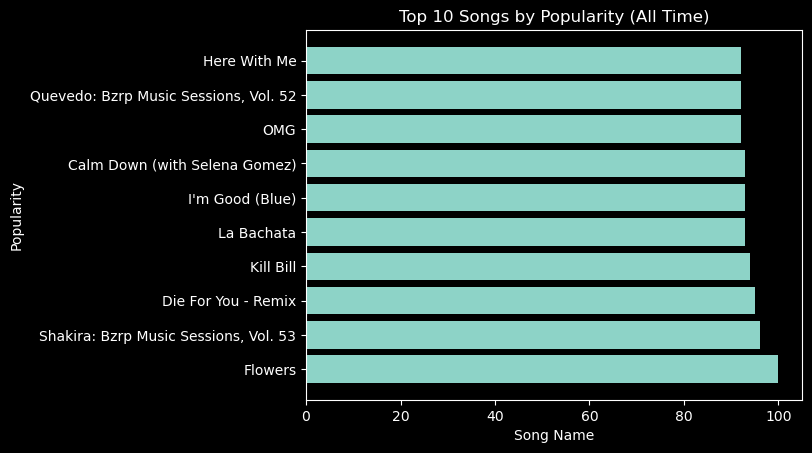

In [6]:
#Bar Chart of Popularity of Top 10 Songs All Time

plt.barh(y = top10alltime['track_name'], width = top10alltime['popularity'])
plt.title('Top 10 Songs by Popularity (All Time)')
plt.xlabel('Song Name')
plt.ylabel('Popularity')
plt.show()

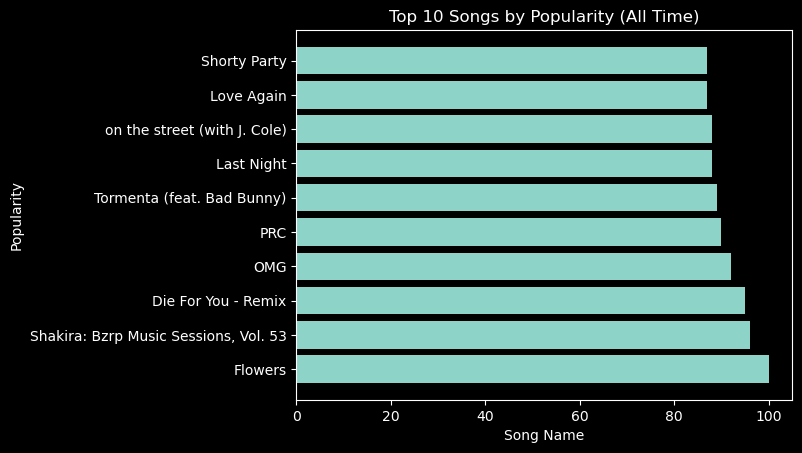

In [7]:
#Bar Chart of Popularity of Top 10 Songs 2023

plt.barh(y = top10_2023['track_name'], width = top10_2023['popularity'])
plt.title('Top 10 Songs by Popularity (All Time)')
plt.xlabel('Song Name')
plt.ylabel('Popularity')
plt.show()